**AIR QUALITY MONITORING**

**Background**

The objective of this project is to monitor and analyze the air quality trend in our environment specifically the Southeast Calgary area. Air quality readings were sourced from Calgary Region Airshed Zone (CRAZ) for the last 10 years (from 2014 - 2024) from the Calgary SE & Inglewood Craz's monitoring station.

Air Quality Data analysis for the last decade

10 CSV files of yearly hourly readings from 2014 - 2024 were obtained from Craz's SE monitoring stations. These 10 csv files were combined and data cleaning were performed for detailed data analysis.

**Data Cleaning**

**Step 1**: Load and combine pollutant readings CSV files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project


In [3]:
import pandas as pd
import glob
import os

# Defining  the correct file path (relative to the python ipnyb file location
file_path = "/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project/craz air data"  # Using the relative path to the folder to extract all csv files
file_names = glob.glob(os.path.join(file_path, "*.csv"))  # Get all CSV files in the folder

if not file_names:
    print("No files found in the specified directory. Check the folder and try again.")
else:
    all_data = []
    for file in file_names:
        try:
            # Read each file, combining the 2nd and 3rd rows as column headers. This would be done to help track Calgry NG and Calgry SE
            df = pd.read_csv(file, header=[1, 2])  # Use multi-level header (rows 2 and 3)

            # Extract the year from the file name (e.g., "2014 hourly.csv")
            year = os.path.basename(file).split()[0]  # Extract the year from the file name
            df["Year"] = int(year)  # Add the year as a column

            # Flatten the multi-level column headers into single strings
            df.columns = ["_".join(filter(None, col)).strip() for col in df.columns]

            # Append the processed DataFrame to the list
            all_data.append(df)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    # Combine all files into a single DataFrame
    if all_data:
        merged_data = pd.concat(all_data, ignore_index=True)

        # Display the DataFrame in the notebook
        print("Data merged successfully. Displaying first 5 rows:")
        display(merged_data.head())  # Use display() to show the DataFrame in the notebook

        # Saving to a CSV file just to be sure of all the rows and columns not missing out.
        merged_data.to_csv("Merged_Air_Quality_Data.csv", index=False)
        print("Merged data saved as 'Merged_Air_Quality_Data.csv'.")
    else:
        print("No data could be processed.")

Data merged successfully. Displaying first 5 rows:


,Unnamed: 0_level_0_Unnamed: 0_level_1,Unnamed: 1_level_0_Unnamed: 1_level_1,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalIng_ PM2.5.1,CalIng_ PM2.5S,...,CalVar_ NO2,CalVar_ NOX,CalVar_ CO,CalVar_ O3,CalVar_ PM2.5,CalVar_ PM2.5S,CalVar_ RH,CalVar_ WS,CalVar_ WD,Year
0,NaN,NaN,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,...,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,2014
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
3,NaN,NaN,BC,BC,BC,BC,BC,BC,BC,BC,...,BC,BC,BC,BC,BC,BC,BC,BC,BC,2014
4,1.0,01/01/2014 0:00,0.01426,0.03088,0.04524,0.326,0.00316,16.267,MS,MS,...,15.214,15.841,0.244,15.354,11.945,MS,96.434,8.809,301.803,2014


Merged data saved as 'Merged_Air_Quality_Data.csv'.


**Data Cleaning**

**Step 2**: Perform EDA - rename and drop some columns not required for the analysis

In [4]:
# Basic Analysis of the Merged Dataset

# Total number of rows and columns
total_rows, total_columns = merged_data.shape
print(f"Total Rows: {total_rows}, Total Columns: {total_columns}")


Total Rows: 95012, Total Columns: 36


In [5]:
# Column names in the dataset
print("\nColumn Names:")
print(merged_data.columns.tolist())


Column Names:
['Unnamed: 0_level_0_Unnamed: 0_level_1', 'Unnamed: 1_level_0_Unnamed: 1_level_1', 'CalIng_ NO', 'CalIng_ NO2', 'CalIng_ NOX', 'CalIng_ CO', 'CalIng_ O3', 'CalIng_ PM2.5', 'CalIng_ PM2.5.1', 'CalIng_ PM2.5S', 'CalIng_ ET', 'CalIng_ RH', 'CalIng_ WS', 'CalIng_ WD', 'CalSE_ SO2', 'CalSE_ NO', 'CalSE_ NO2', 'CalSE_ NOX', 'CalSE_ CO', 'CalSE_ O3', 'CalSE_ PM2.5', 'CalSE_ ET', 'CalSE_ RH', 'CalSE_ WS', 'CalSE_ WD', 'CalVar_ NO', 'CalVar_ NO2', 'CalVar_ NOX', 'CalVar_ CO', 'CalVar_ O3', 'CalVar_ PM2.5', 'CalVar_ PM2.5S', 'CalVar_ RH', 'CalVar_ WS', 'CalVar_ WD', 'Year']


In [6]:
# Commencing EDA, renaming some columns, and pick out key columns

# Clean and prepare the dataset, including removing the time from the DateTime column

# Remove first 3 rows, rename column 2 as date time, and pick the Inglewood (Callng) and SE (Calse)  monitoring station for analysis.

# Step 1: Copy the dataset for processing
cleaned_data = merged_data.copy()

# Drop the first 3 rows (assuming they are irrelevant)
cleaned_data = cleaned_data.iloc[4:].reset_index(drop=True)

# Step 2: Rename the 'Unnamed: 1_level_0_Unnamed: 1_level_1' column to 'DateTime'
cleaned_data.rename(columns={"Unnamed: 1_level_0_Unnamed: 1_level_1": "DateTime"}, inplace=True)

# Step 3: Remove the time from the 'DateTime' column, using dayfirst=True
cleaned_data["DateTime"] = pd.to_datetime(cleaned_data["DateTime"], dayfirst=True).dt.date

# Step 4: Select the required columns
columns_to_keep = [
    "DateTime", "CalIng_ NO", "CalIng_ NO2", "CalIng_ NOX", "CalIng_ CO",
    "CalIng_ O3", "CalIng_ PM2.5", "CalSE_ SO2", "CalSE_ NO", "CalSE_ NO2",
    "CalSE_ NOX", "CalSE_ CO", "CalSE_ O3", "CalSE_ PM2.5", "Year"
]
cleaned_data = cleaned_data[columns_to_keep]

# Display the cleaned dataset for review
print("Cleaned Dataset (First 5 Rows):")
display(cleaned_data.head())

Cleaned Dataset (First 5 Rows):


,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,MS,MS,MS,MS,MS,MS,MS,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,MS,MS,MS,MS,MS,MS,MS,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.009,10.164,MS,MS,MS,MS,MS,MS,MS,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,MS,MS,MS,MS,MS,MS,MS,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,MS,MS,MS,MS,MS,MS,MS,2014


In [7]:
# Check the structure of the cleaned dataset
print("\nCleaned Dataset Info:")
cleaned_data.info()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95008 entries, 0 to 95007
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       94968 non-null  object
 1   CalIng_ NO     94988 non-null  object
 2   CalIng_ NO2    94988 non-null  object
 3   CalIng_ NOX    94988 non-null  object
 4   CalIng_ CO     94988 non-null  object
 5   CalIng_ O3     94988 non-null  object
 6   CalIng_ PM2.5  94988 non-null  object
 7   CalSE_ SO2     94988 non-null  object
 8   CalSE_ NO      94988 non-null  object
 9   CalSE_ NO2     94988 non-null  object
 10  CalSE_ NOX     94988 non-null  object
 11  CalSE_ CO      94988 non-null  object
 12  CalSE_ O3      94988 non-null  object
 13  CalSE_ PM2.5   94988 non-null  object
 14  Year           95008 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 10.9+ MB


In [8]:
# Save the cleaned data for future use
cleaned_data.to_csv("Cleaned_Air_Quality_Data.csv", index=False)
print("\nCleaned data saved as 'Cleaned_Air_Quality_Data.csv'.")


Cleaned data saved as 'Cleaned_Air_Quality_Data.csv'.


In [9]:
# Check for null values, missing values, and data types in the cleaned dataset

# Check for null values in each column
print("\nNull Values in Each Column:")
print(cleaned_data.isnull().sum())


Null Values in Each Column:
DateTime         40
CalIng_ NO       20
CalIng_ NO2      20
CalIng_ NOX      20
CalIng_ CO       20
CalIng_ O3       20
CalIng_ PM2.5    20
CalSE_ SO2       20
CalSE_ NO        20
CalSE_ NO2       20
CalSE_ NOX       20
CalSE_ CO        20
CalSE_ O3        20
CalSE_ PM2.5     20
Year              0
dtype: int64


In [10]:
import warnings
warnings.filterwarnings("ignore")

# Define the numerical columns explicitly
numerical_columns = [
    "CalIng_ NO", "CalIng_ NO2", "CalIng_ NOX", "CalIng_ CO", "CalIng_ O3", "CalIng_ PM2.5",
    "CalSE_ SO2", "CalSE_ NO", "CalSE_ NO2", "CalSE_ NOX", "CalSE_ CO", "CalSE_ O3", "CalSE_ PM2.5"
]

# Remove rows with missing DateTime values since median can't be applied to Datetime
cleaned_data = cleaned_data.dropna(subset=["DateTime"]).reset_index(drop=True)

# Ensure all numerical columns are filled with their respective medians
for col in numerical_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')  # Convert values to numeric if necessary
    cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)  # Fill NaN with the column median

# Check for any remaining missing values
print("\nRemaining Missing Values in Each Column After Cleaning:")
print(cleaned_data.isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset (First 5 Rows):")
display(cleaned_data.head())



Remaining Missing Values in Each Column After Cleaning:
DateTime         0
CalIng_ NO       0
CalIng_ NO2      0
CalIng_ NOX      0
CalIng_ CO       0
CalIng_ O3       0
CalIng_ PM2.5    0
CalSE_ SO2       0
CalSE_ NO        0
CalSE_ NO2       0
CalSE_ NOX       0
CalSE_ CO        0
CalSE_ O3        0
CalSE_ PM2.5     0
Year             0
dtype: int64

Cleaned Dataset (First 5 Rows):


,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.00900,10.164,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014


**Step 3**:

#Exploratory Data Analysis

In [11]:
# Basic Statistics for Numerical Columns
print("\nSummary Statistics for Numerical Columns:")
print(cleaned_data.describe())



Summary Statistics for Numerical Columns:
         CalIng_ NO   CalIng_ NO2   CalIng_ NOX    CalIng_ CO    CalIng_ O3  \
count  94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean      -0.305518     -0.300766     -0.290362     -0.185413     -0.397997   
std       56.198467     56.198490     56.198558     64.893759     64.892137   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%        0.000360      0.005280      0.006160      0.142000      0.010680   
50%        0.001390      0.010820      0.012760      0.183000      0.023290   
75%        0.006910      0.021480      0.028760      0.263000      0.033940   
max        0.336840      0.094100      0.424250      4.194000      0.087620   

       CalIng_ PM2.5    CalSE_ SO2     CalSE_ NO    CalSE_ NO2    CalSE_ NOX  \
count   94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean        7.047862     -0.315546     -0.309926     -0.303373     -0.297306   
std  

**General Observations**:

Negative Values in Data:Many columns (e.g., CalIng_ NO, CalIng_ NO2, CalSE_ PM2.5, etc.) have minimum values as -9999.000000. This is likely a placeholder for missing or invalid data.


Columns like CalSE_ PM2.5 have an extremely high maximum value (555.99) compared to the mean (7.93).
Indicates the presence of significant outliers.


For PM2.5, both CalIng and CalSE have close means (7.04 and 7.93 respectively).
Indicates comparable air quality levels for this pollutant across the two stations.

Consistent Year Values:
The Year column ranges from 2014 to 2024, which confirms the dataset spans 10 years.

In [12]:
# Remove rows with missing DateTime or Year values
cleaned_data = cleaned_data.dropna(subset=["DateTime", "Year"]).reset_index(drop=True)

# Replace placeholder values (-9999 or similar) with NaN only in numerical columns
for col in numerical_columns:
    cleaned_data[col].replace(-9999, float('NaN'), inplace=True)  # Replace -9999 with NaN
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')  # Ensure numeric values

# Fill NaN values in numerical columns with their respective medians
for col in numerical_columns:
    cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)

# Verify if -9999 or NaN values are still present
print("\nSummary Statistics After Cleaning Placeholder Values and Imputation:")
print(cleaned_data.describe())


Summary Statistics After Cleaning Placeholder Values and Imputation:
         CalIng_ NO   CalIng_ NO2   CalIng_ NOX    CalIng_ CO    CalIng_ O3  \
count  94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean       0.010346      0.015098      0.025503      0.235747      0.023156   
std        0.024810      0.012766      0.035033      0.178072      0.014963   
min       -0.119960     -0.157630     -0.188280     -0.309000     -0.281250   
25%        0.000360      0.005280      0.006160      0.142000      0.010680   
50%        0.001390      0.010820      0.012760      0.183000      0.023290   
75%        0.006910      0.021480      0.028760      0.263000      0.033940   
max        0.336840      0.094100      0.424250      4.194000      0.087620   

       CalIng_ PM2.5    CalSE_ SO2     CalSE_ NO    CalSE_ NO2    CalSE_ NOX  \
count   94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean        7.047862      0.000318      0.005938      0.01

In [13]:
cleaned_data.head()

,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.00900,10.164,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014


from matplotlib import pyplot as plt
_df_0['CalIng_ NO'].plot(kind='hist', bins=20, title='CalIng_ NO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CalIng_ NO2'].plot(kind='hist', bins=20, title='CalIng_ NO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CalIng_ NOX'].plot(kind='hist', bins=20, title='CalIng_ NOX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CalIng_ CO'].plot(kind='hist', bins=20, title='CalIng_ CO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CalIng_ NO', y='CalIng_ NO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CalIng_ NO2', y='CalIng_ NOX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='CalIng_ NOX', y='CalIng_ CO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CalIng_ CO', y='CalIng_ O3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateTime']
  ys = series['CalIng_ NO']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('DateTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateTime')
_ = plt.ylabel('CalIng_ NO')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateTime']
  ys = series['CalIng_ NO2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('DateTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateTime')
_ = plt.ylabel('CalIng_ NO2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateTime']
  ys = series['CalIng_ NOX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('DateTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateTime')
_ = plt.ylabel('CalIng_ NOX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateTime']
  ys = series['CalIng_ CO']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('DateTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateTime')
_ = plt.ylabel('CalIng_ CO')

from matplotlib import pyplot as plt
_df_12['CalIng_ NO'].plot(kind='line', figsize=(8, 4), title='CalIng_ NO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['CalIng_ NO2'].plot(kind='line', figsize=(8, 4), title='CalIng_ NO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['CalIng_ NOX'].plot(kind='line', figsize=(8, 4), title='CalIng_ NOX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['CalIng_ CO'].plot(kind='line', figsize=(8, 4), title='CalIng_ CO')
plt.gca().spines[['top', 'right']].set_visible(False)

**Step 4**:

# Visualize Distributions

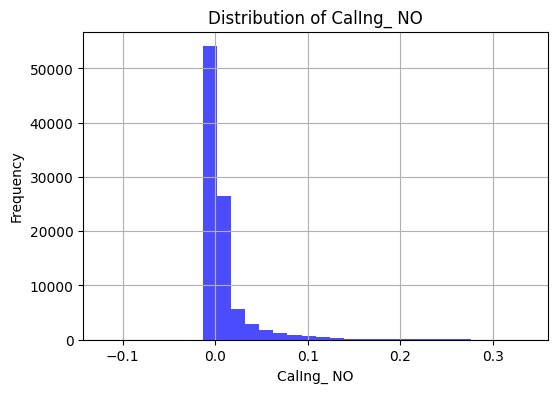

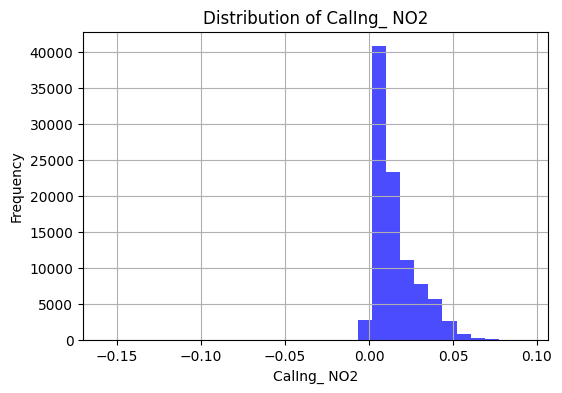

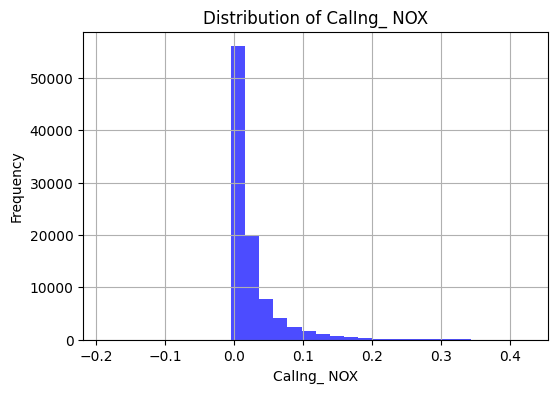

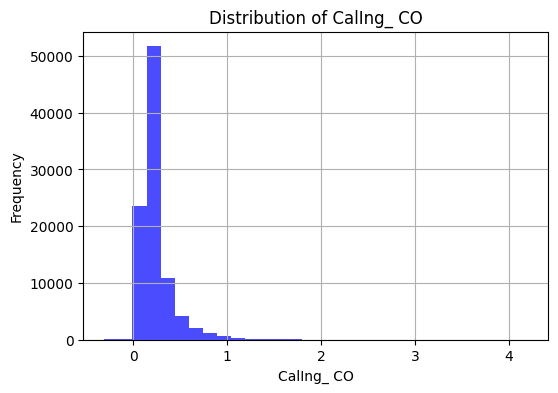

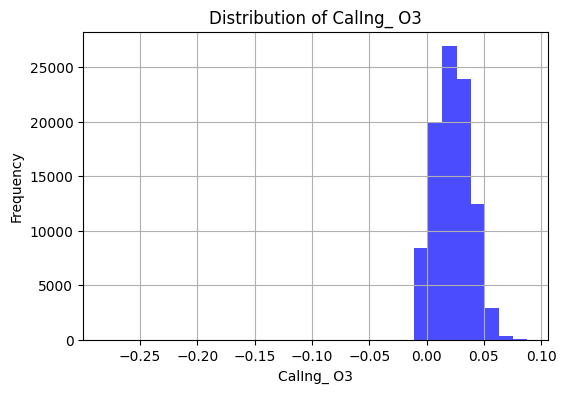

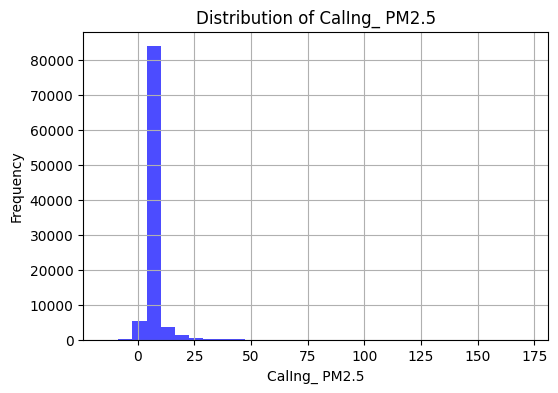

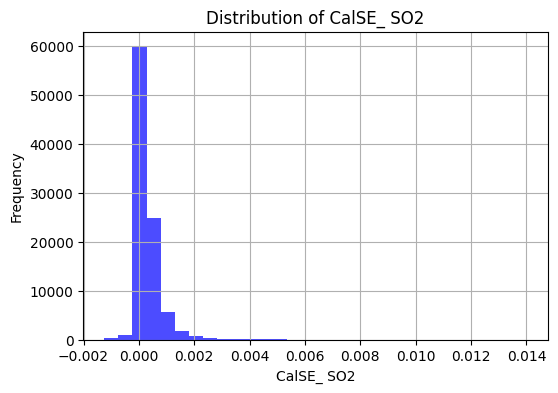

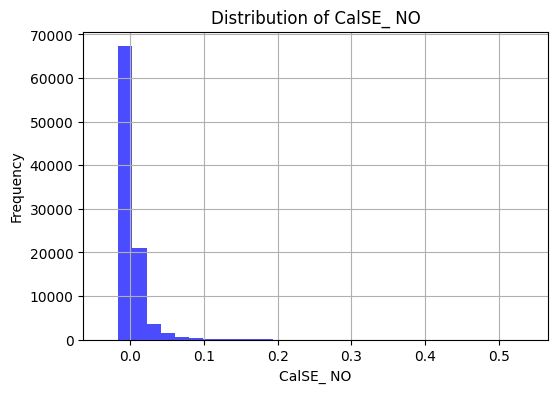

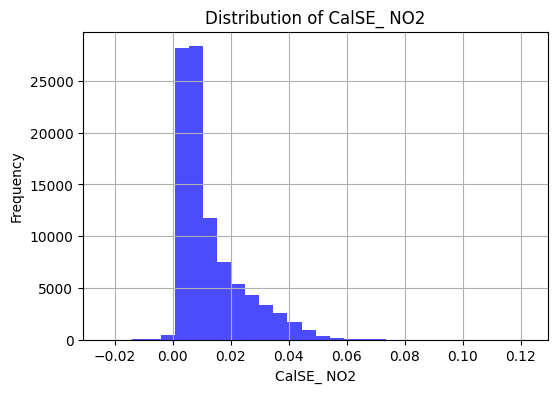

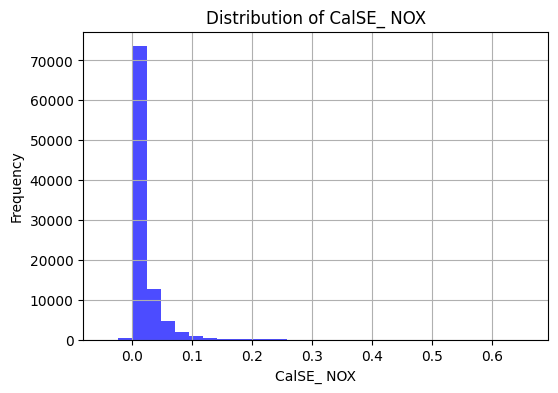

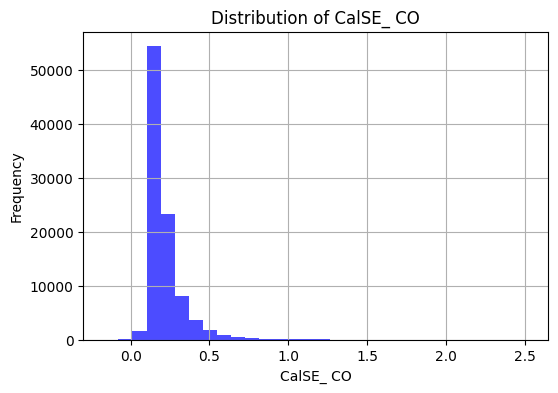

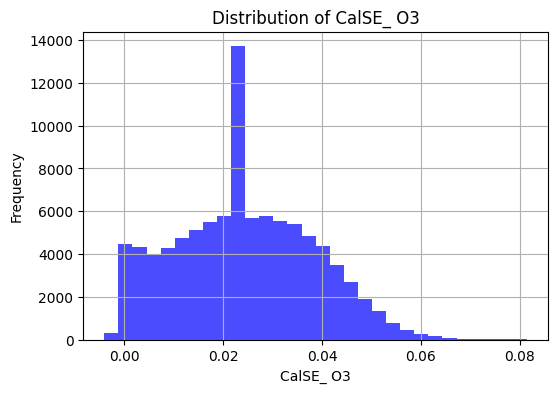

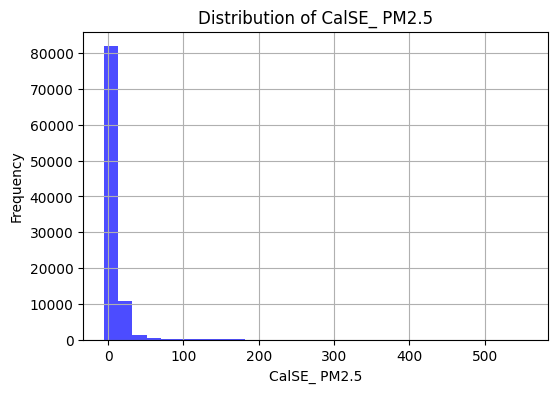

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    cleaned_data[col].hist(bins=30, alpha=0.7, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


**Step 5**:
## Correlation analysis




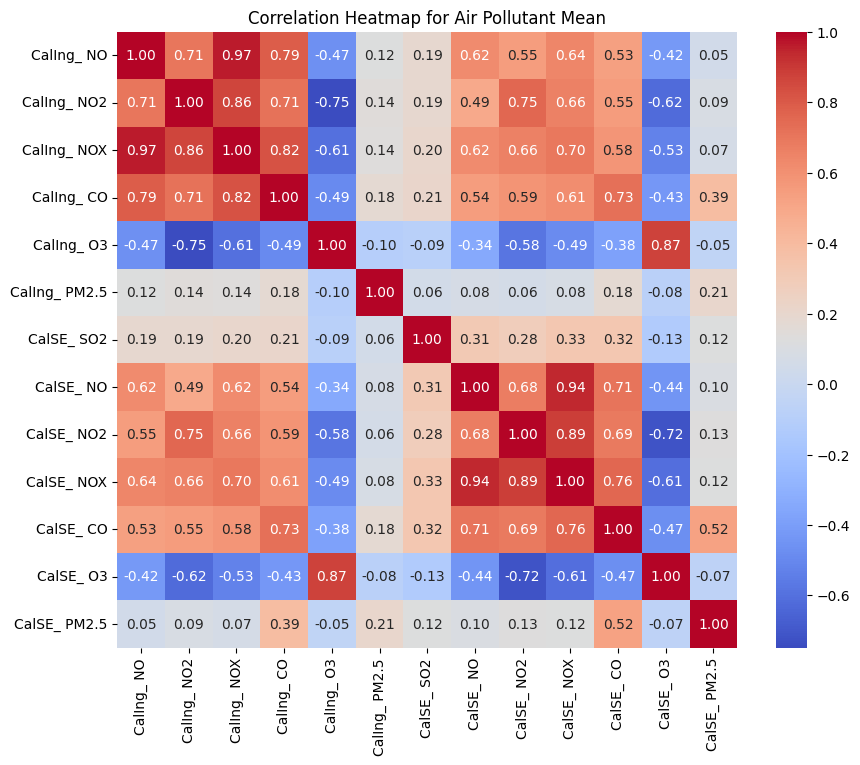

In [15]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = cleaned_data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Air Pollutant Mean")
plt.show()

**Step 6**:

# Trends over time

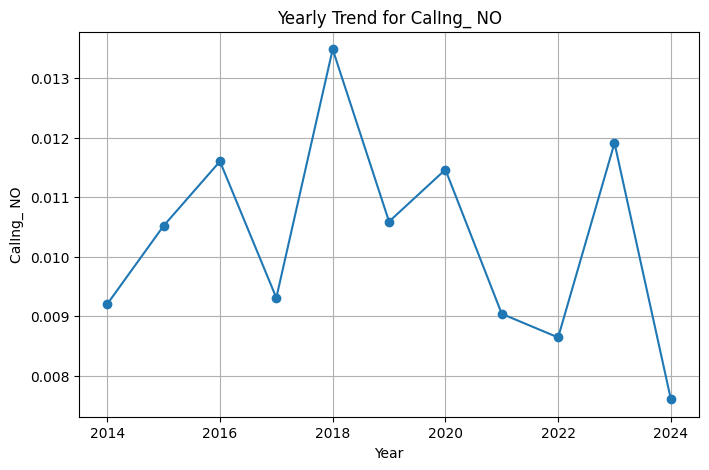

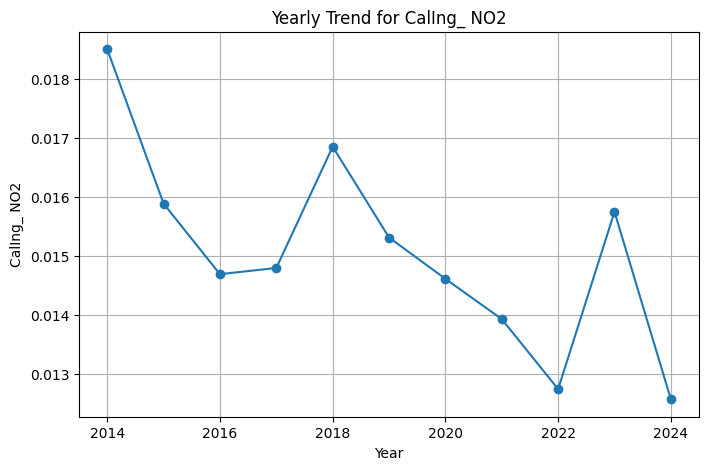

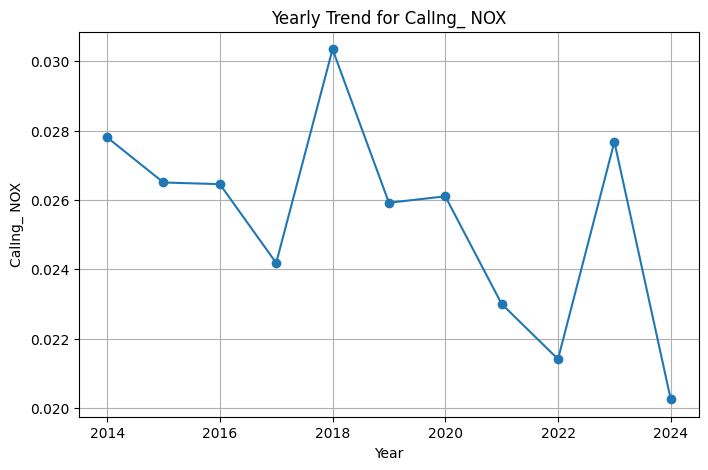

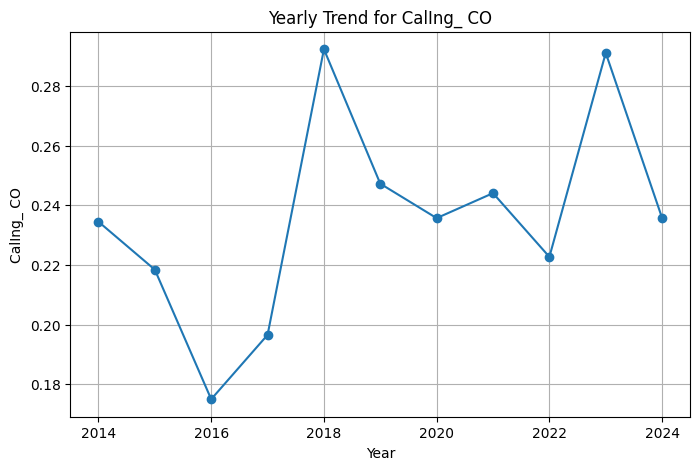

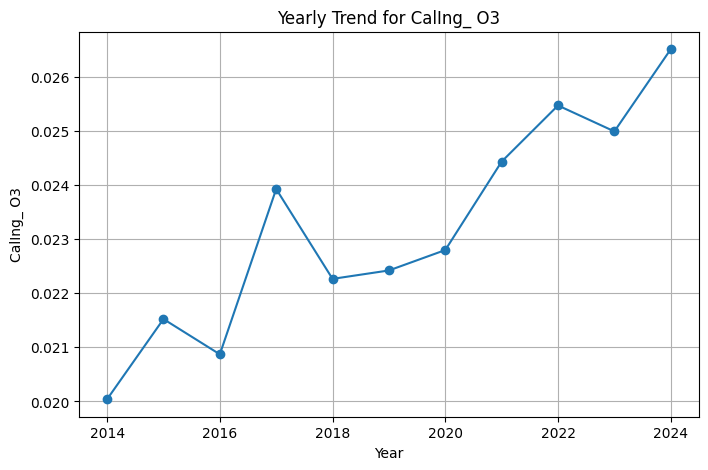

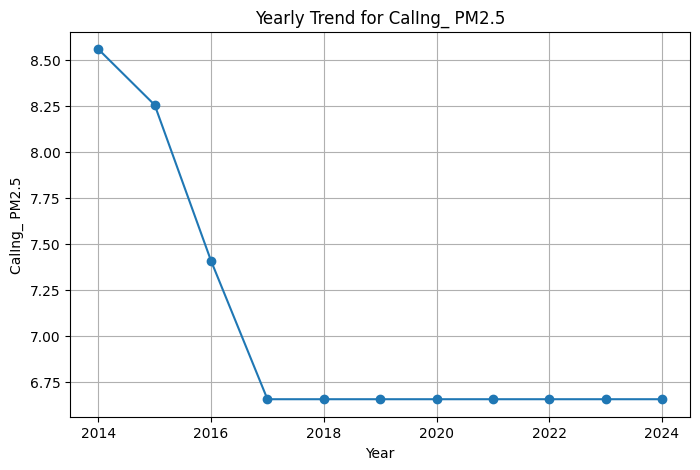

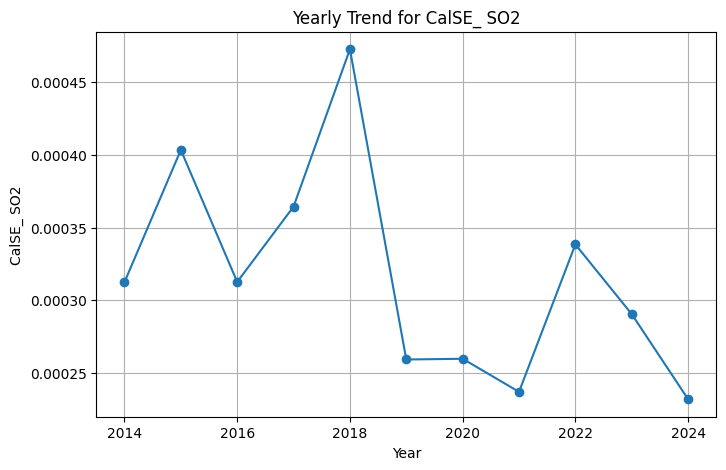

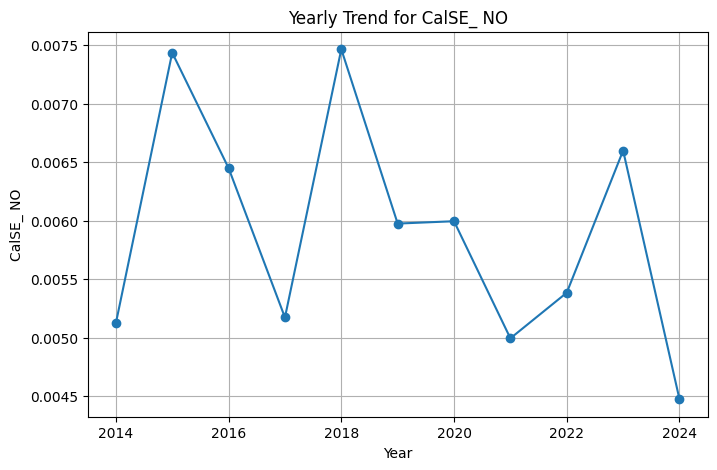

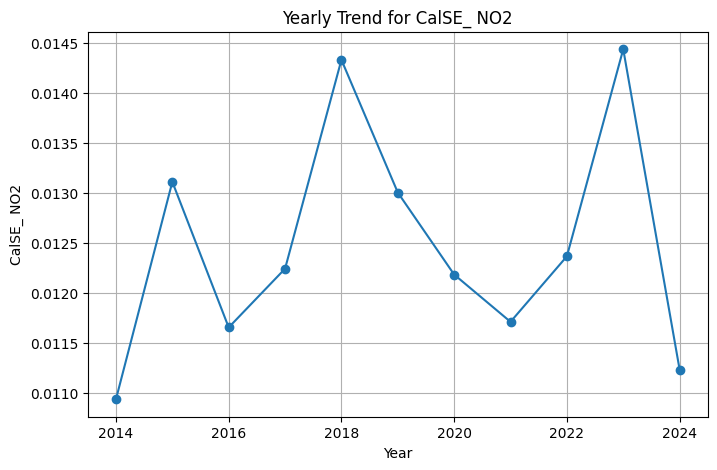

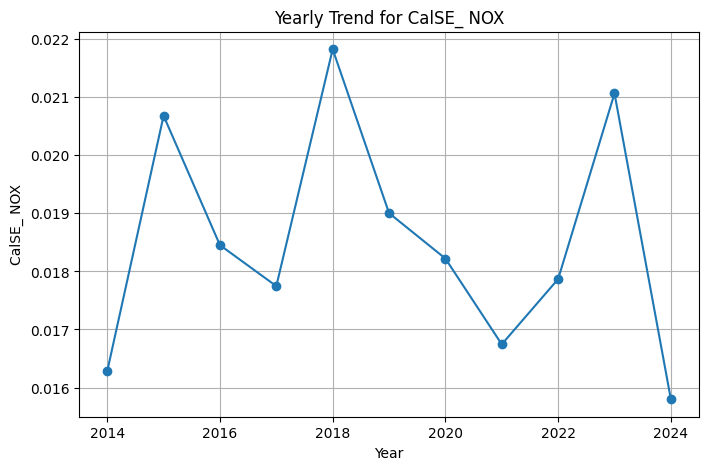

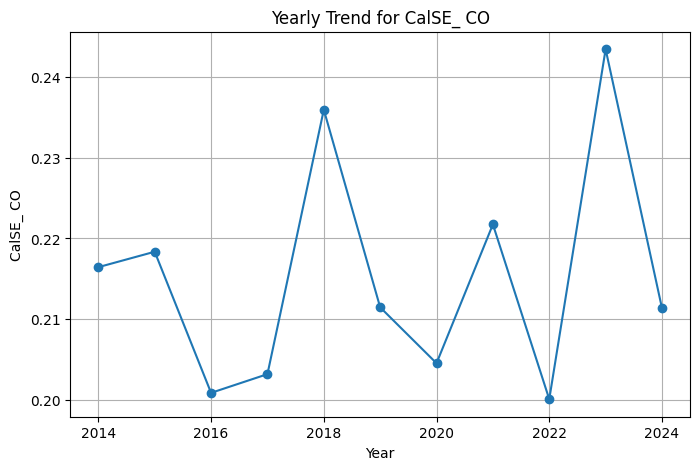

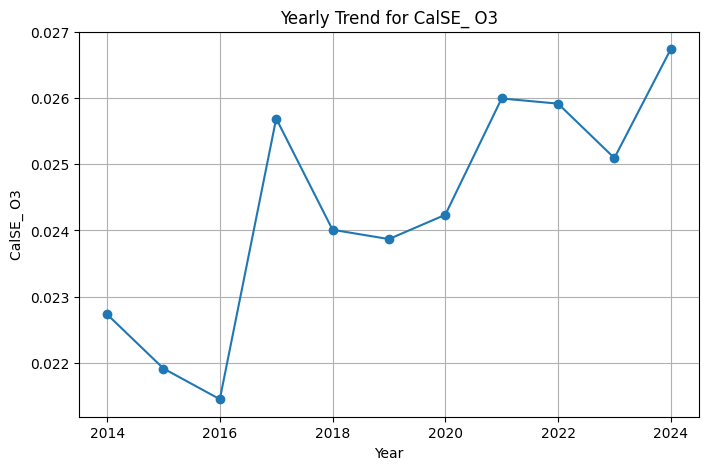

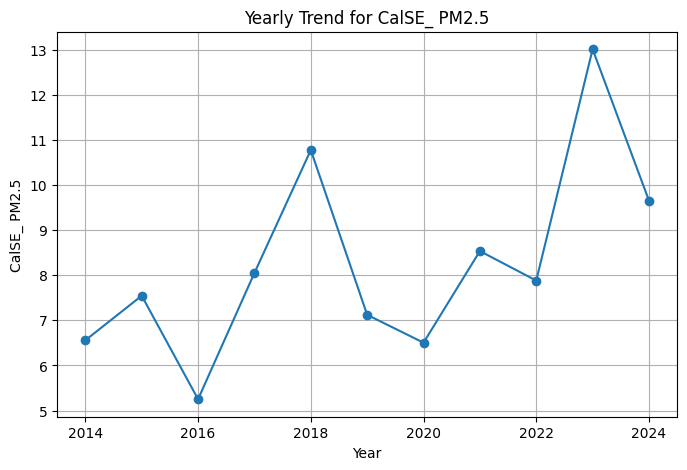

In [16]:
# Convert DateTime to datetime format if not already done
cleaned_data["DateTime"] = pd.to_datetime(cleaned_data["DateTime"])

# Group data by year and calculate the mean for each pollutant
yearly_trends = cleaned_data.groupby(cleaned_data["DateTime"].dt.year).mean()

# Plot trends for each pollutant
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    yearly_trends[col].plot(marker='o', linestyle='-', title=f"Yearly Trend for {col}")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

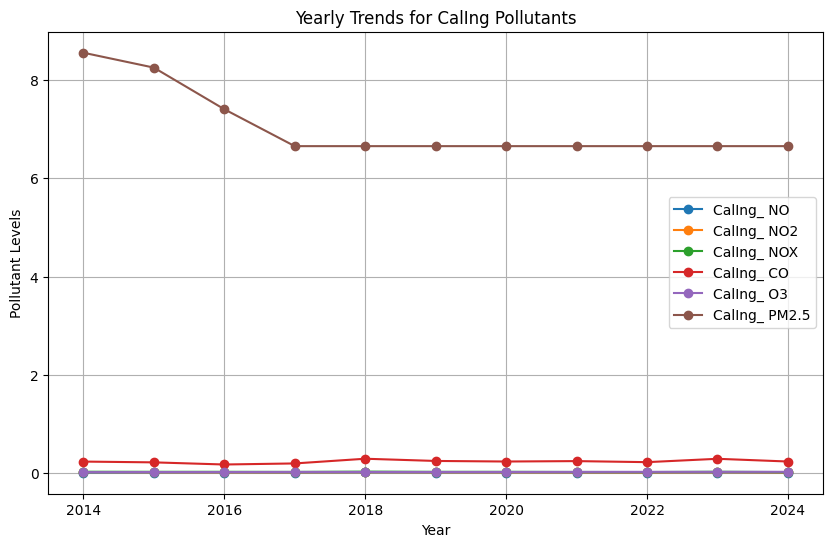

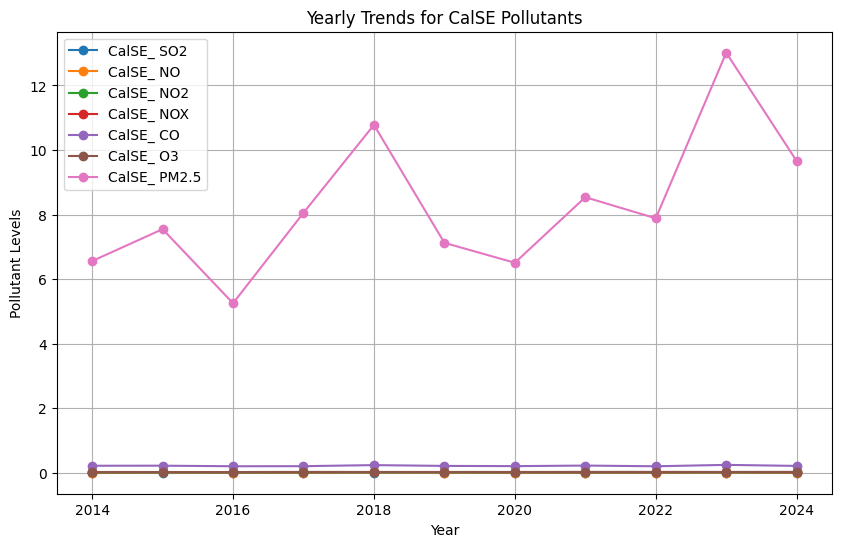

In [17]:
# Trend for the Two Monitoring Stations CalSE and CalIng

import matplotlib.pyplot as plt
import pandas as pd

# Convert DateTime to datetime format if not already done
cleaned_data["DateTime"] = pd.to_datetime(cleaned_data["DateTime"])

# Group data by year and calculate the mean for each pollutant
yearly_trends = cleaned_data.groupby(cleaned_data["DateTime"].dt.year).mean()

# Separate columns into CalIng and CalSE pollutants
calling_columns = [col for col in numerical_columns if "CalIng" in col]
calse_columns = [col for col in numerical_columns if "CalSE" in col]

# Plot trends for CalIng pollutants in one graph
plt.figure(figsize=(10, 6))
for col in calling_columns:
    plt.plot(yearly_trends.index, yearly_trends[col], marker='o', linestyle='-', label=col)
plt.title("Yearly Trends for CalIng Pollutants")
plt.xlabel("Year")
plt.ylabel("Pollutant Levels")
plt.grid(True)
plt.legend()
plt.show()

# Plot trends for CalSE pollutants in another graph
plt.figure(figsize=(10, 6))
for col in calse_columns:
    plt.plot(yearly_trends.index, yearly_trends[col], marker='o', linestyle='-', label=col)
plt.title("Yearly Trends for CalSE Pollutants")
plt.xlabel("Year")
plt.ylabel("Pollutant Levels")
plt.grid(True)
plt.legend()
plt.show()

**Step 7**:

Comparative Analysis for PM2.5 levels

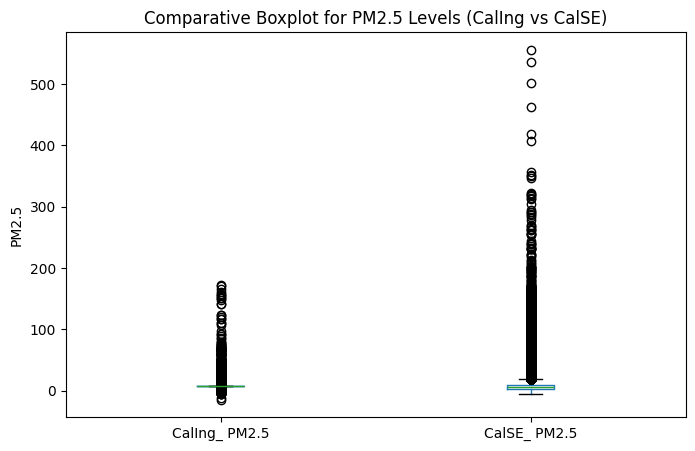

In [18]:
# Compare PM2.5 levels for CalIng and CalSE
plt.figure(figsize=(8, 5))
cleaned_data.boxplot(column=["CalIng_ PM2.5", "CalSE_ PM2.5"], grid=False)
plt.title("Comparative Boxplot for PM2.5 Levels (CalIng vs CalSE)")
plt.ylabel("PM2.5")
plt.show()

In [19]:
# Define WHO 24-hour PM2.5 thresholds
good_threshold = 15  # Good: ≤ 15 µg/m³
moderate_threshold = 25  # Moderate: 16–25 µg/m³

# Classification function for three categories
def classify_pm25_3categories(value):
    if value <= good_threshold:
        return "Good"
    elif value <= moderate_threshold:
        return "Moderate"
    else:
        return "Unhealthy"

# Generate target for CalIng_PM2.5 based on thresholds
cleaned_data["CalIng_PM2.5_Quality"] = cleaned_data["CalIng_ PM2.5"].apply(classify_pm25_3categories)

# Generate target for CalSE_PM2.5 based on thresholds
cleaned_data["CalSE_PM2.5_Quality"] = cleaned_data["CalSE_ PM2.5"].apply(classify_pm25_3categories)

# Check the distribution of the new target variables
print("\nDistribution of CalIng_PM2.5_Quality:")
print(cleaned_data["CalIng_PM2.5_Quality"].value_counts())

print("\nDistribution of CalSE_PM2.5_Quality:")
print(cleaned_data["CalSE_PM2.5_Quality"].value_counts())

# Display the first few rows to verify
print("\nDataset with Target Columns (First 5 Rows):")
display(cleaned_data[["CalIng_ PM2.5", "CalIng_PM2.5_Quality", "CalSE_ PM2.5", "CalSE_PM2.5_Quality"]].head())



Distribution of CalIng_PM2.5_Quality:
CalIng_PM2.5_Quality
Good         92242
Moderate      2101
Unhealthy      625
Name: count, dtype: int64

Distribution of CalSE_PM2.5_Quality:
CalSE_PM2.5_Quality
Good         84202
Moderate      6970
Unhealthy     3796
Name: count, dtype: int64

Dataset with Target Columns (First 5 Rows):


,CalIng_ PM2.5,CalIng_PM2.5_Quality,CalSE_ PM2.5,CalSE_PM2.5_Quality
0,16.267,Moderate,5.402,Good
1,8.501,Good,5.402,Good
2,10.164,Good,5.402,Good
3,8.172,Good,5.402,Good
4,7.305,Good,5.402,Good


from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['CalIng_ PM2.5'].plot(kind='hist', bins=20, title='CalIng_ PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('CalIng_PM2.5_Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='CalIng_ PM2.5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CalIng_ PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CalIng_PM2.5_Quality')):
  _plot_series(series, series_name, i)
  fig.legend(title='CalIng_PM2.5_Quality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CalIng_ PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CalIng_PM2.5_Quality')):
  _plot_series(series, series_name, i)
  fig.legend(title='CalIng_PM2.5_Quality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CalSE_ PM2.5']
  ys = series['CalIng_ PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('CalSE_ PM2.5', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CalIng_PM2.5_Quality')):
  _plot_series(series, series_name, i)
  fig.legend(title='CalIng_PM2.5_Quality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CalSE_ PM2.5')
_ = plt.ylabel('CalIng_ PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CalSE_ PM2.5']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CalSE_ PM2.5'}, axis=1)
              .sort_values('CalSE_ PM2.5', ascending=True))
  xs = counted['CalSE_ PM2.5']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('CalSE_ PM2.5', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CalIng_PM2.5_Quality')):
  _plot_series(series, series_name, i)
  fig.legend(title='CalIng_PM2.5_Quality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CalSE_ PM2.5')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['CalIng_ PM2.5'].plot(kind='line', figsize=(8, 4), title='CalIng_ PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['CalIng_PM2.5_Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='CalIng_PM2.5_Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['CalIng_PM2.5_Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='CalIng_ PM2.5', y='CalIng_PM2.5_Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Step 8**:

# PREDICTIVE MODELLING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (predictors) - Using all numerical columns except PM2.5 and the target
predictors = [col for col in numerical_columns if col not in ["CalIng_ PM2.5", "CalSE_ PM2.5"]]

# Prepare features and targets for CalIng
X_calIng = cleaned_data[predictors]
y_calIng = cleaned_data["CalIng_PM2.5_Quality"]

# Prepare features and targets for CalSE
X_calSE = cleaned_data[predictors]
y_calSE = cleaned_data["CalSE_PM2.5_Quality"]

# Encode target labels (Good -> 0, Moderate -> 1, Unhealthy -> 2)
le = LabelEncoder()
y_calIng_encoded = le.fit_transform(y_calIng)
y_calSE_encoded = le.fit_transform(y_calSE)


In [22]:
# Split CalIng data
X_train_calIng, X_test_calIng, y_train_calIng, y_test_calIng = train_test_split(
    X_calIng, y_calIng_encoded, test_size=0.2, random_state=42
)

# Split CalSE data
X_train_calSE, X_test_calSE, y_train_calSE, y_test_calSE = train_test_split(
    X_calSE, y_calSE_encoded, test_size=0.2, random_state=42
)

# LOGISTIC REGRESSION MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression for CalIng
lr_calIng = LogisticRegression(max_iter=200, random_state=42)
lr_calIng.fit(X_train_calIng, y_train_calIng)

# Train Logistic Regression for CalSE
lr_calSE = LogisticRegression(max_iter=200, random_state=42)
lr_calSE.fit(X_train_calSE, y_train_calSE)

# Predict and evaluate for CalIng
y_pred_calIng = lr_calIng.predict(X_test_calIng)
print("\nClassification Report for CalIng (Logistic Regression):")
print(classification_report(y_test_calIng, y_pred_calIng, target_names=le.classes_))

# Predict and evaluate for CalSE
y_pred_calSE = lr_calSE.predict(X_test_calSE)
print("\nClassification Report for CalSE (Logistic Regression):")
print(classification_report(y_test_calSE, y_pred_calSE, target_names=le.classes_))



Classification Report for CalIng (Logistic Regression):
              precision    recall  f1-score   support

        Good       0.97      1.00      0.99     18458
    Moderate       0.00      0.00      0.00       413
   Unhealthy       0.17      0.01      0.02       123

    accuracy                           0.97     18994
   macro avg       0.38      0.34      0.33     18994
weighted avg       0.95      0.97      0.96     18994


Classification Report for CalSE (Logistic Regression):
              precision    recall  f1-score   support

        Good       0.91      0.99      0.95     16899
    Moderate       0.41      0.05      0.09      1357
   Unhealthy       0.73      0.35      0.47       738

    accuracy                           0.90     18994
   macro avg       0.68      0.46      0.50     18994
weighted avg       0.86      0.90      0.87     18994



# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest for CalIng
rf_calIng = RandomForestClassifier(n_estimators=100, random_state=42)
rf_calIng.fit(X_train_calIng, y_train_calIng)

# Train Random Forest for CalSE
rf_calSE = RandomForestClassifier(n_estimators=100, random_state=42)
rf_calSE.fit(X_train_calSE, y_train_calSE)

# Predict and evaluate for CalIng
y_pred_rf_calIng = rf_calIng.predict(X_test_calIng)
print("\nClassification Report for CalIng (Random Forest):")
print(classification_report(y_test_calIng, y_pred_rf_calIng, target_names=le.classes_))

# Predict and evaluate for CalSE
y_pred_rf_calSE = rf_calSE.predict(X_test_calSE)
print("\nClassification Report for CalSE (Random Forest):")
print(classification_report(y_test_calSE, y_pred_rf_calSE, target_names=le.classes_))



Classification Report for CalIng (Random Forest):
              precision    recall  f1-score   support

        Good       0.97      1.00      0.99     18458
    Moderate       0.50      0.02      0.05       413
   Unhealthy       0.62      0.07      0.12       123

    accuracy                           0.97     18994
   macro avg       0.70      0.36      0.38     18994
weighted avg       0.96      0.97      0.96     18994


Classification Report for CalSE (Random Forest):
              precision    recall  f1-score   support

        Good       0.92      0.99      0.96     16899
    Moderate       0.53      0.11      0.19      1357
   Unhealthy       0.80      0.50      0.61       738

    accuracy                           0.91     18994
   macro avg       0.75      0.54      0.59     18994
weighted avg       0.89      0.91      0.89     18994



# Confusion Matrix


Confusion Matrix for Logistic Regression (CalIng):


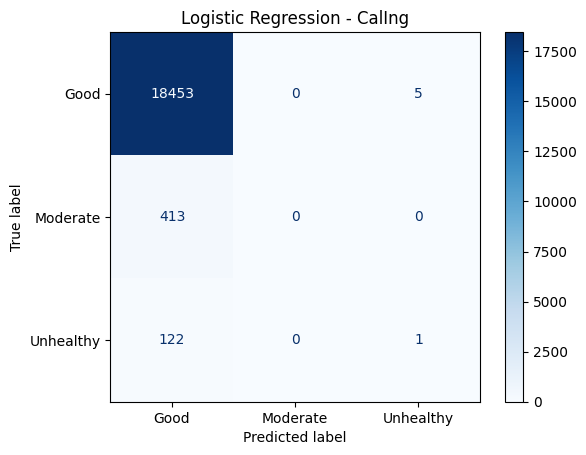


Confusion Matrix for Logistic Regression (CalSE):


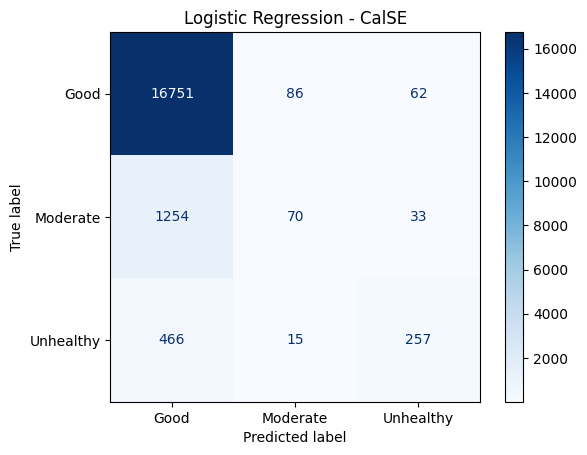


Confusion Matrix for Random Forest (CalIng):


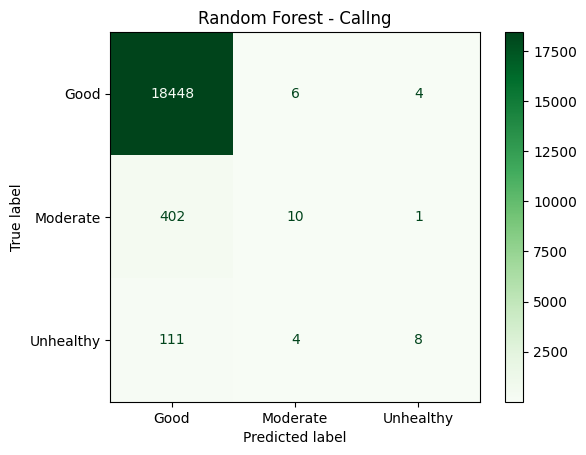


Confusion Matrix for Random Forest (CalSE):


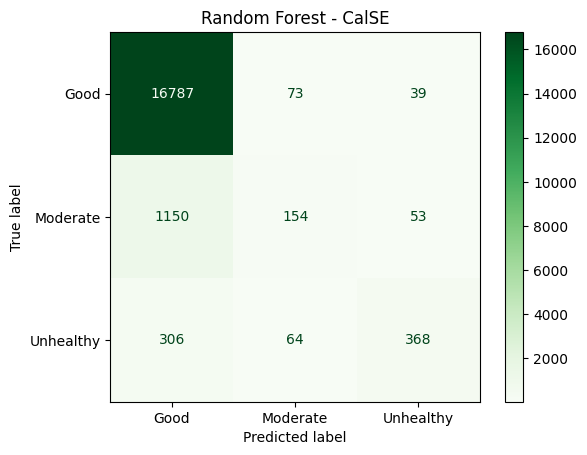

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Logistic Regression (CalIng)
print("\nConfusion Matrix for Logistic Regression (CalIng):")
ConfusionMatrixDisplay.from_estimator(
    lr_calIng, X_test_calIng, y_test_calIng, display_labels=le.classes_, cmap="Blues"
)
plt.title("Logistic Regression - CalIng")
plt.show()

# Plot confusion matrix for Logistic Regression (CalSE)
print("\nConfusion Matrix for Logistic Regression (CalSE):")
ConfusionMatrixDisplay.from_estimator(
    lr_calSE, X_test_calSE, y_test_calSE, display_labels=le.classes_, cmap="Blues"
)
plt.title("Logistic Regression - CalSE")
plt.show()

# Plot confusion matrix for Random Forest (CalIng)
print("\nConfusion Matrix for Random Forest (CalIng):")
ConfusionMatrixDisplay.from_estimator(
    rf_calIng, X_test_calIng, y_test_calIng, display_labels=le.classes_, cmap="Greens"
)
plt.title("Random Forest - CalIng")
plt.show()

# Plot confusion matrix for Random Forest (CalSE)
print("\nConfusion Matrix for Random Forest (CalSE):")
ConfusionMatrixDisplay.from_estimator(
    rf_calSE, X_test_calSE, y_test_calSE, display_labels=le.classes_, cmap="Greens"
)
plt.title("Random Forest - CalSE")
plt.show()